# Tensor Flow 2.0

## Features
1. High Level Keras API
2. Eager Exexcution - Like normal python, no Session

## Setup
conda install -c anaconda tensorflow-gpu==2.0.0

In [95]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8
tf.__version__

'2.0.0'

In [96]:
# 初始化随机种子, 保证结果可重复
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

## Tensors
1. data container
2. abbitray dimension(scaler, vector, matrix)
3. float or int, string

In [97]:
x = tf.constant(1)
print(x)

tf.Tensor(1, shape=(), dtype=int32)


In [98]:
# 转换为numpy
x.numpy()

1

In [99]:
m = tf.constant([[1, 2, 1], [3, 4, 2]])
m

<tf.Tensor: id=175736, shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 1],
       [3, 4, 2]])>

## Helpers

In [100]:
ones = tf.ones([3, 3])
ones

<tf.Tensor: id=175739, shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [101]:
zeros = tf.zeros([2, 3])
zeros

<tf.Tensor: id=175742, shape=(2, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [102]:
tf.reshape(zeros, [3, 2])
zeros

<tf.Tensor: id=175742, shape=(2, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [103]:
# 转置
tf.transpose(zeros)
zeros

<tf.Tensor: id=175742, shape=(2, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

## Tensor Math

In [104]:
a = tf.constant(1)
b = tf.constant(1)
tf.add(a, b).numpy()

2

In [105]:
(a+b).numpy()

2

In [106]:
d1 = tf.constant([[1, 2], [1, 2]]);
d2 = tf.constant([[3, 4], [3, 4]]);
tf.tensordot(d1, d2, axes=1).numpy()

array([[ 9, 12],
       [ 9, 12]])

## 采样

### 正态分布

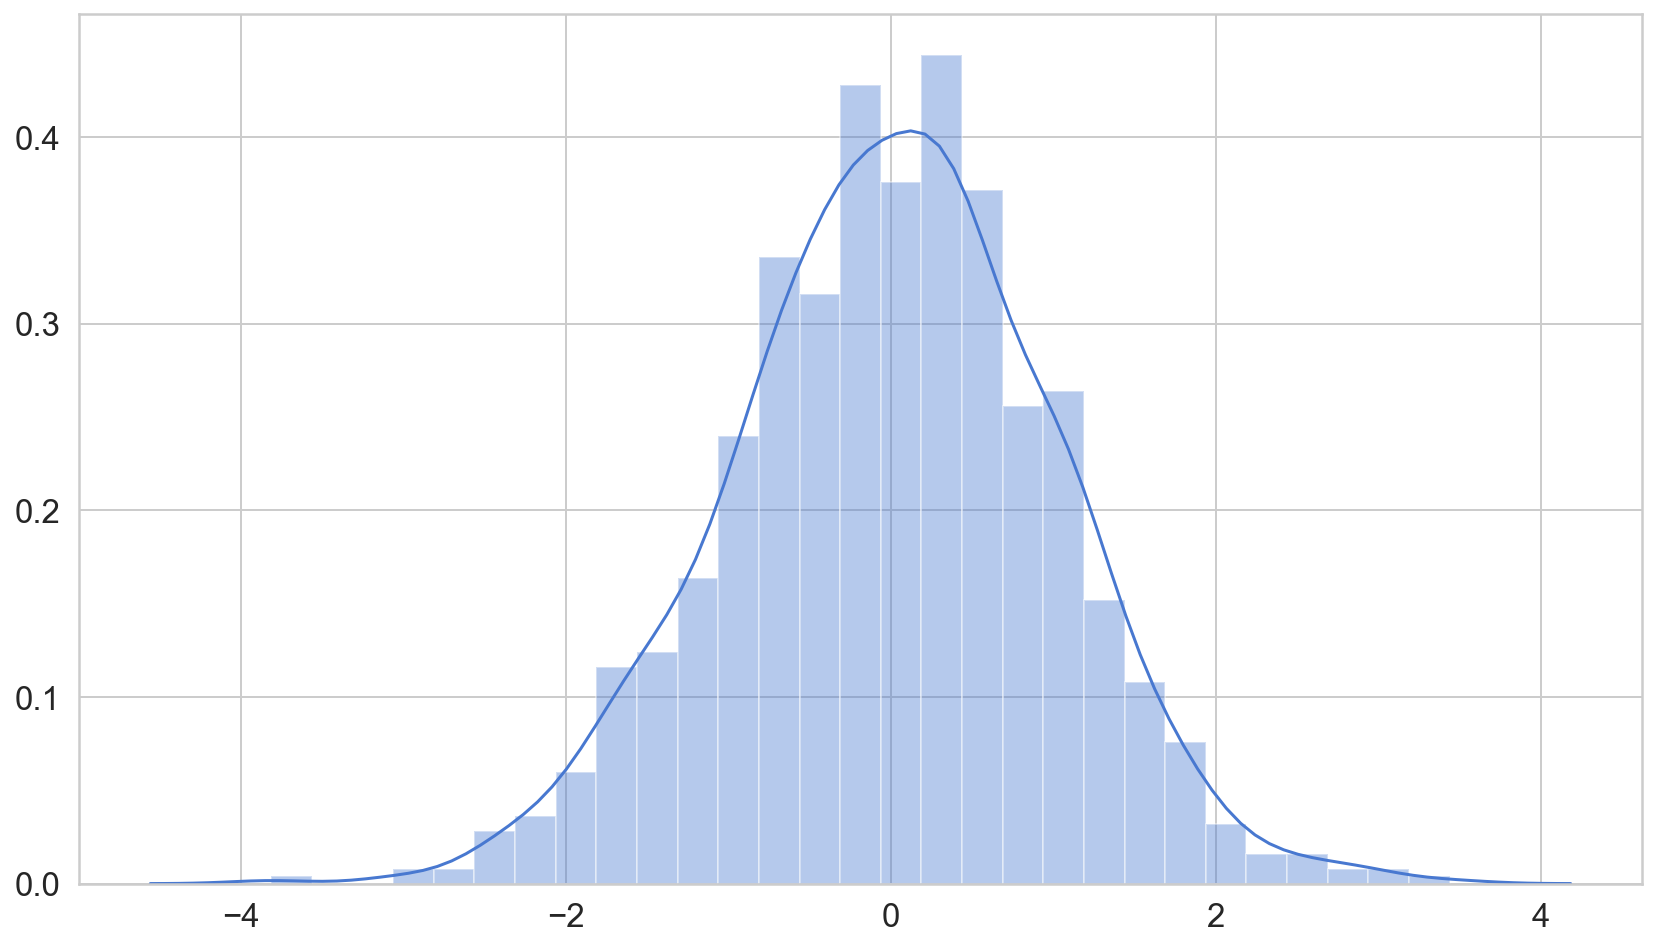

In [107]:
norm = tf.random.normal(shape=(1000, 1), mean=0., stddev=1.)
norm.numpy().shape
sns.distplot(norm)

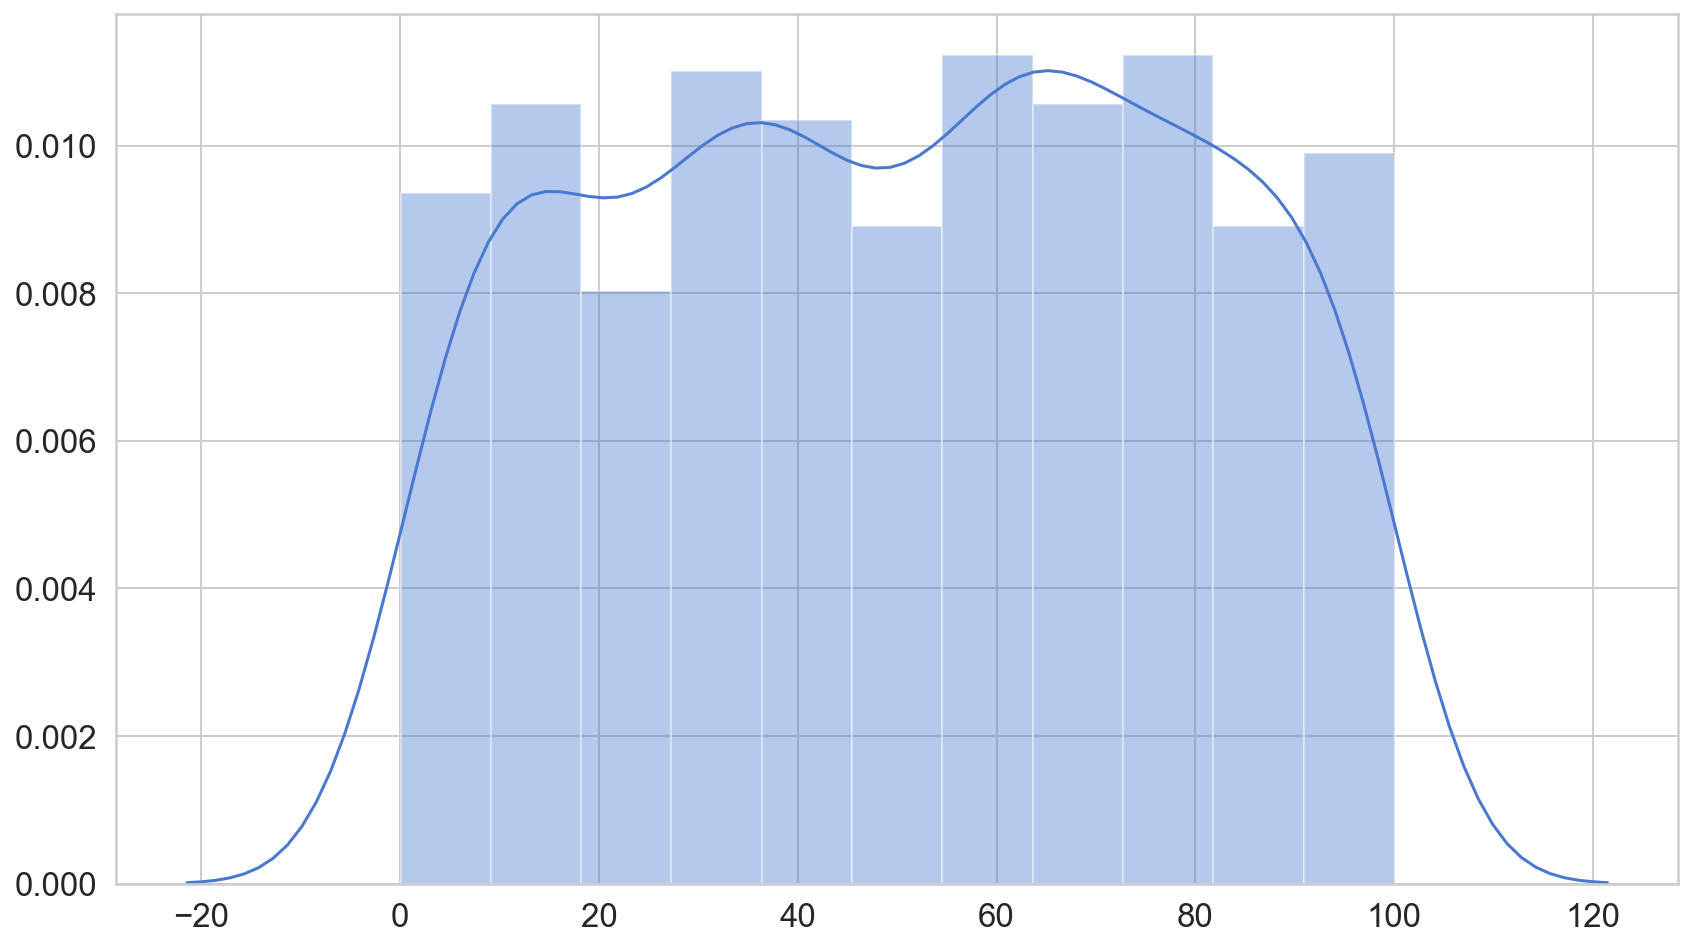

In [108]:
unif = tf.random.uniform(shape=(1000, 1), minval=0, maxval=100)
norm.numpy().shape
sns.distplot(unif)

### 泊松分布

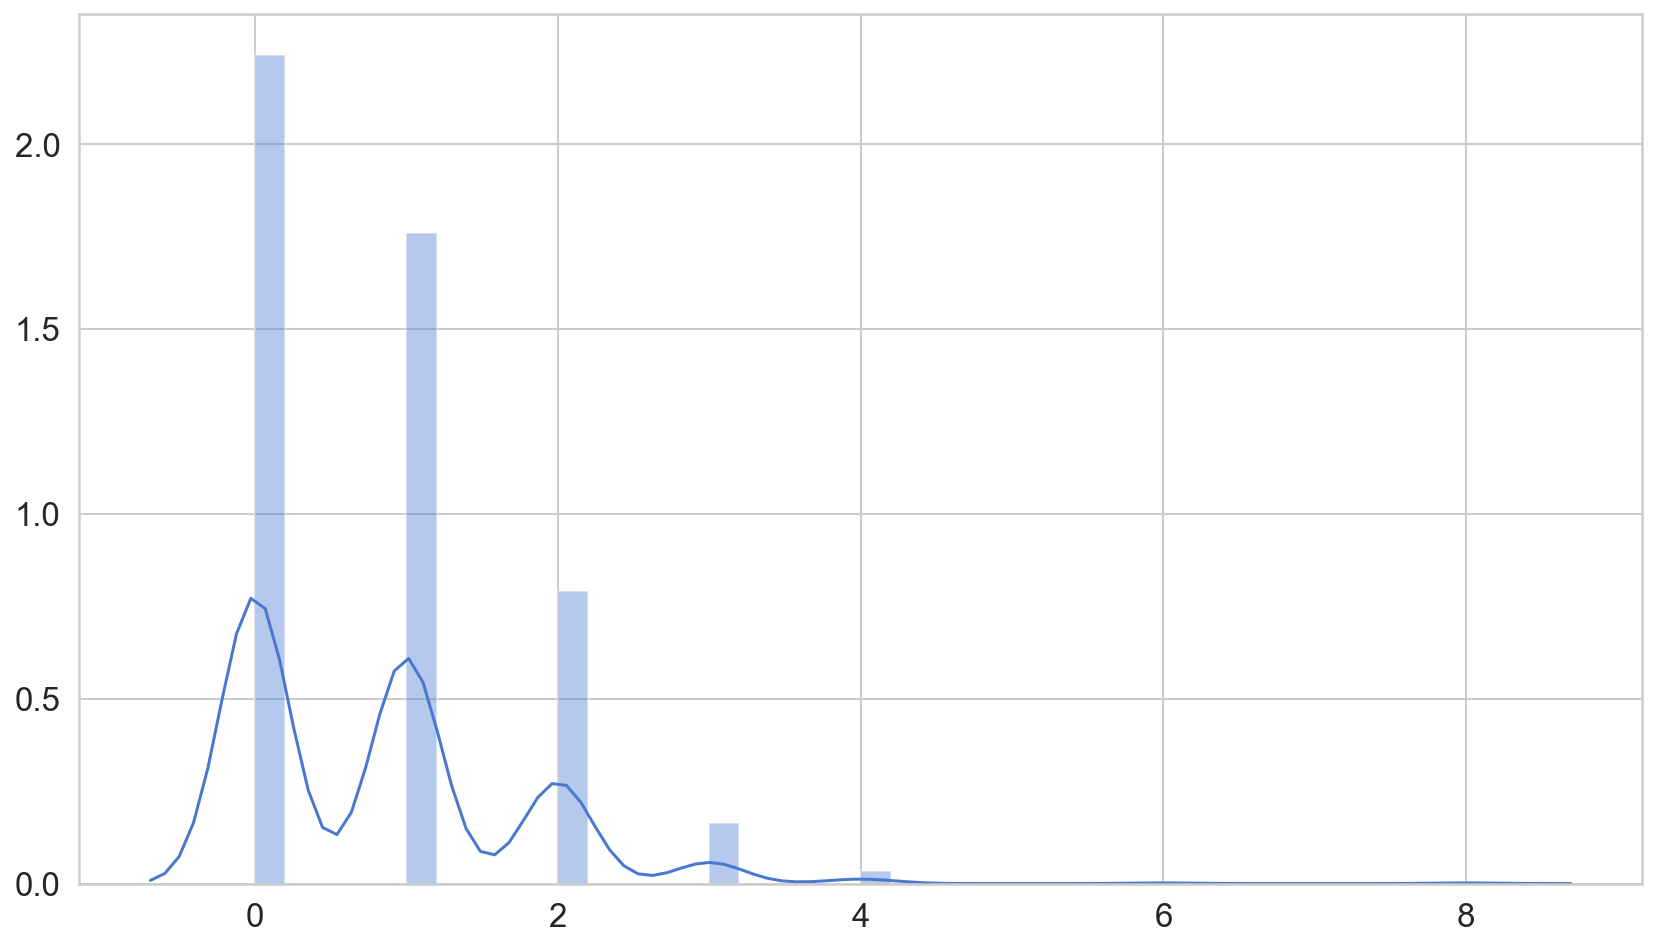

In [109]:
pois = tf.random.poisson(shape=(1000, 1), lam=0.8)
sns.distplot(pois)

### 高斯分布

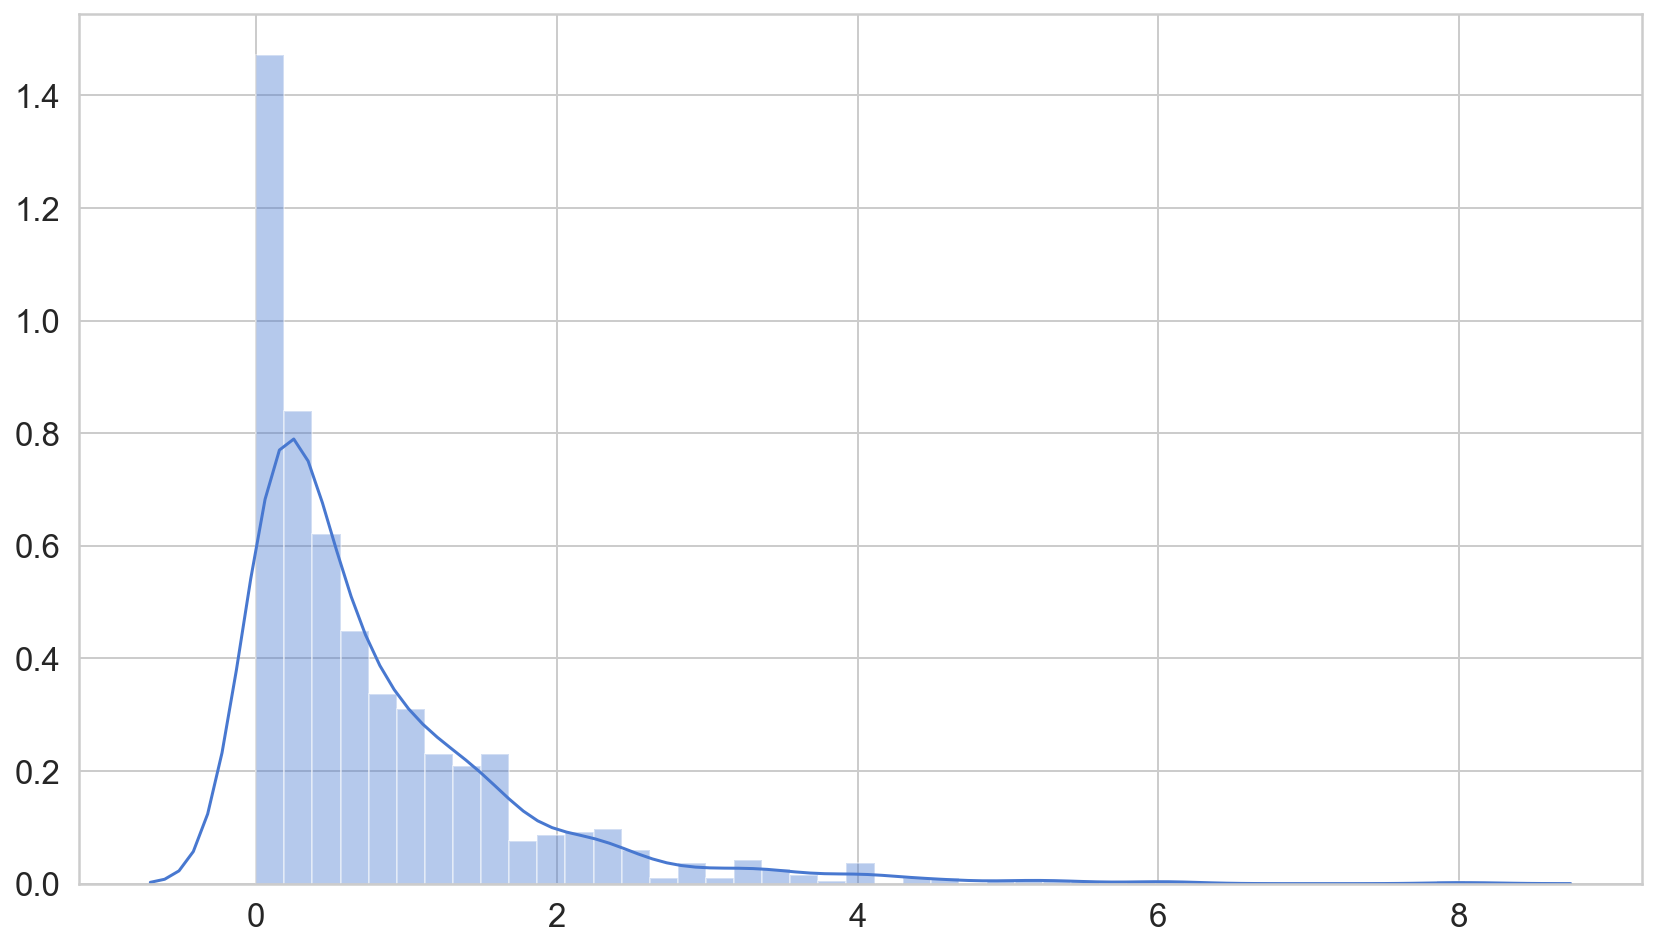

In [110]:
gam = tf.random.gamma(shape=(1000, 1), alpha=0.8)
sns.distplot(gam)

# 线性回归模型

In [111]:
data = tf.constant([
  [4,2],
  [4,10],
  [7,4],
  [7,22],
  [8,16],
  [9,10],
  [10,18],
  [10,26],
  [10,34],
  [11,17],
  [11,28],
  [12,14],
  [12,20],
  [12,24],
  [12,28],
  [13,26],
  [13,34],
  [13,34],
  [13,46],
  [14,26],
  [14,36],
  [14,60],
  [14,80],
  [15,20],
  [15,26],
  [15,54],
  [16,32],
  [16,40],
  [17,32],
  [17,40],
  [17,50],
  [18,42],
  [18,56],
  [18,76],
  [18,84],
  [19,36],
  [19,46],
  [19,68],
  [20,32],
  [20,48],
  [20,52],
  [20,56],
  [20,64],
  [22,66],
  [23,54],
  [24,70],
  [24,92],
  [24,93],
  [24,120],
  [25,85]
])

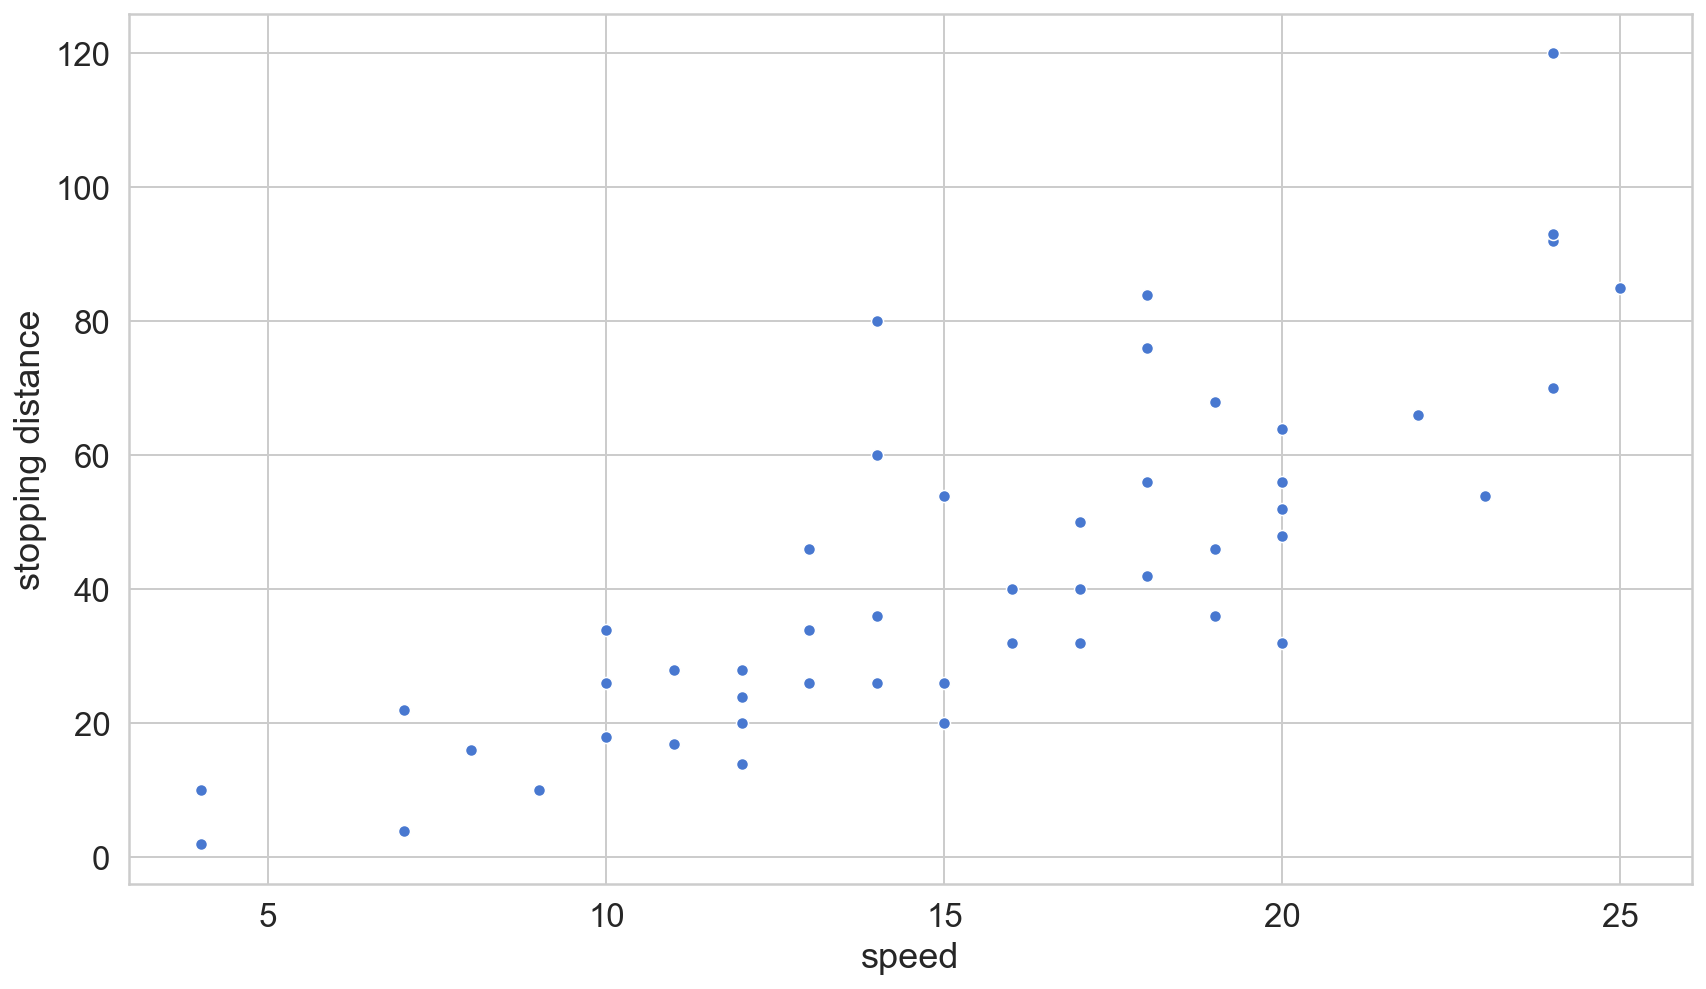

In [112]:
speed = data[:, 0]
stopping_distance = data[:, 1]
sns.scatterplot(speed, stopping_distance);
plt.xlabel("speed")
plt.ylabel("stopping distance");

In [113]:
lin_reg = keras.Sequential([
  layers.Dense(1, activation='linear', input_shape=[1]), # Dense: 全连接层, input:1, input_shape=[1]
])

In [114]:
'''
RMSProp optimizer.
It is recommended to leave the parameters of this optimizer at their default values
(except for the learning rate, which can be freely tuned). This optimizer is usually a good choice for recurrent neural networks.
'''

optimizer = tf.keras.optimizers.RMSprop(0.001)

lin_reg.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mse'])

In [115]:
history = lin_reg.fit(
  x=speed,
  y=stopping_distance,
  shuffle=True,
  epochs=1000,
  validation_split=0.2,
  verbose=0
)

In [116]:
def plot_error(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],
            label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
            label = 'Val Error')

  plt.legend()
  plt.show()

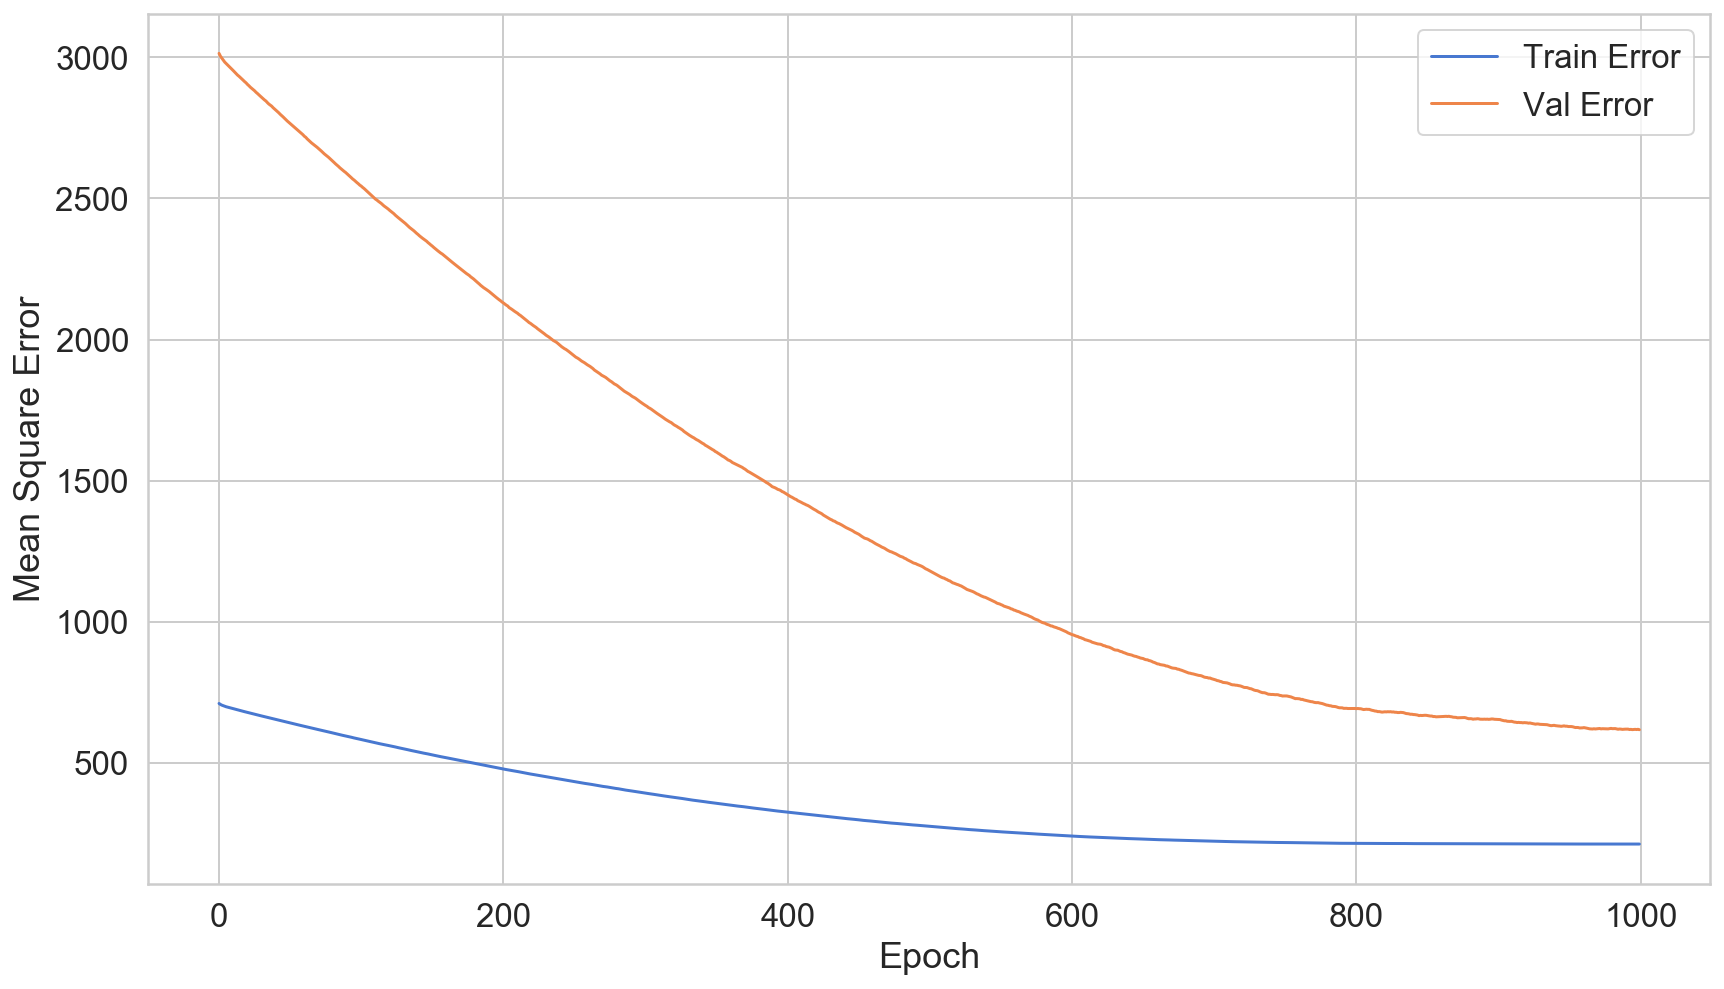

In [121]:
plot_error(history)

In [122]:
lin_reg.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [125]:
#weights = lin_reg.get_layer("dense_16").get_weights()
#intercept = weights[0][0][0]
#slope = weights[1][0]
#print(intercept)
#print(slope)

2.5057995
1.3159121


# 简单神经网络

In [126]:
def build_neural_net():
  net = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[1]),
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
  ])
   
  optimizer = tf.keras.optimizers.RMSprop(0.001)

  net.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mse', 'accuracy'])
  
  return net

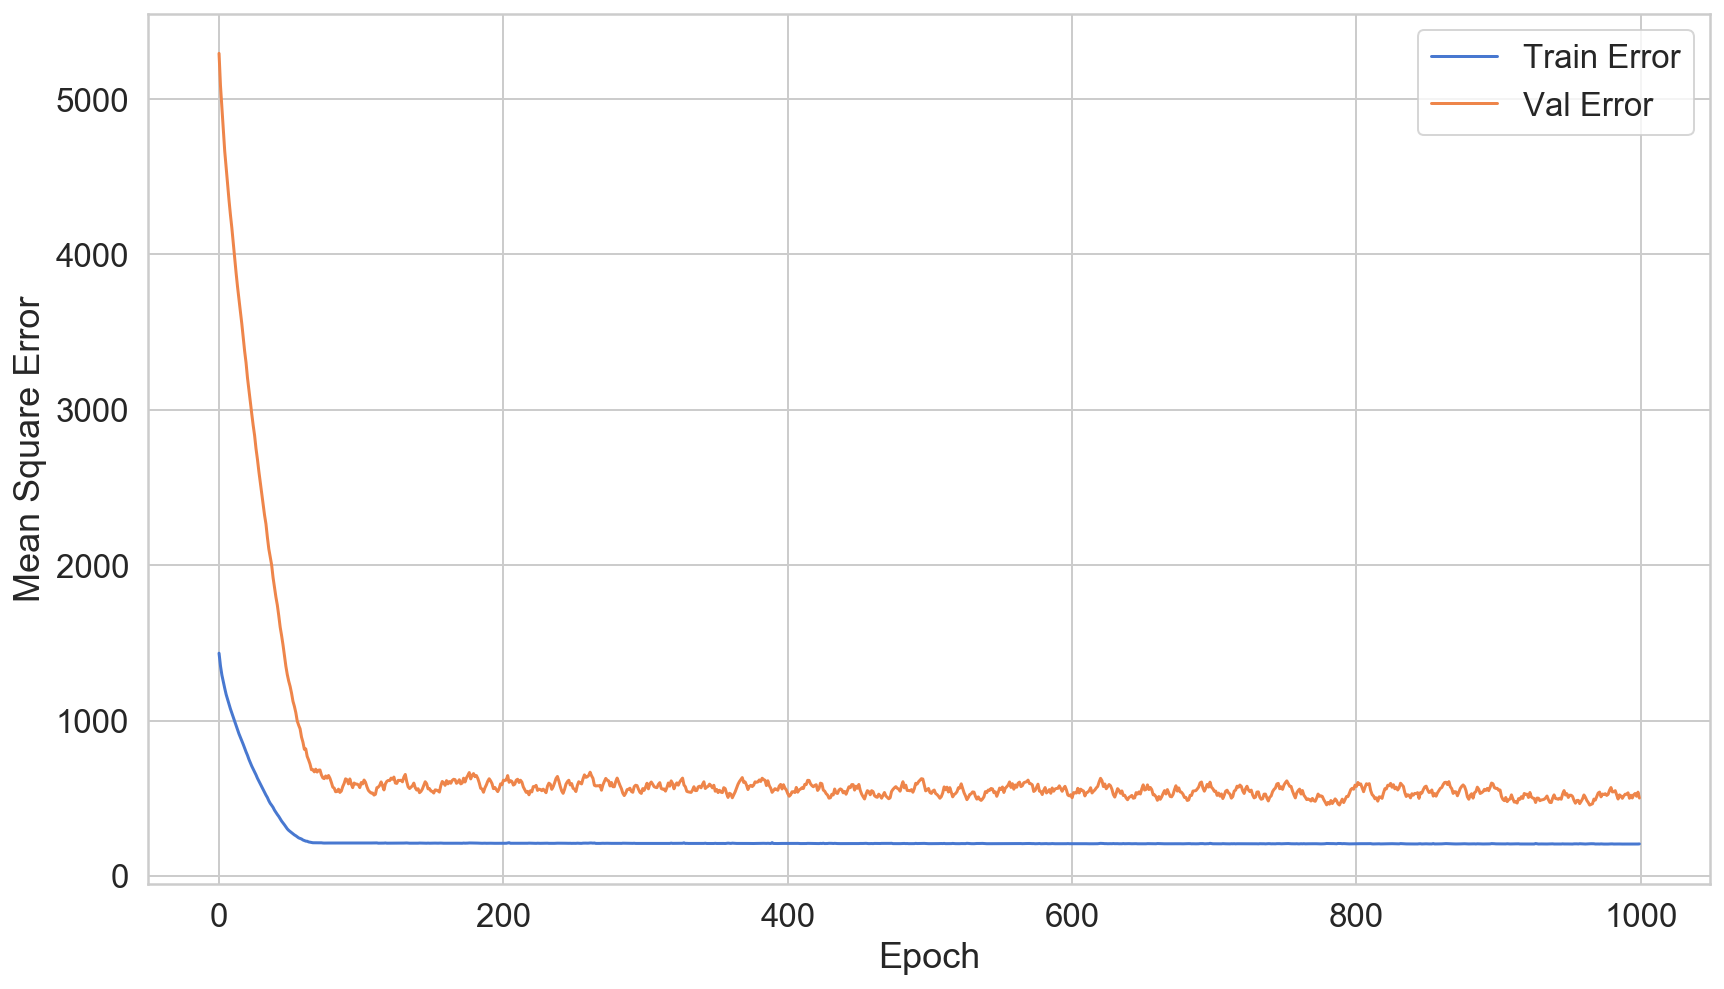

In [127]:
net = build_neural_net()
history = net.fit(
  x=speed,
  y=stopping_distance,
  shuffle=True,
  epochs=1000,
  validation_split=0.2,
  verbose=0
)
plot_error(history)

## Early Stopping

In [128]:
early_stop = keras.callbacks.EarlyStopping(
  monitor='val_loss',
  patience=10
)
net = build_neural_net()

history = net.fit(
  x=speed,
  y=stopping_distance,
  shuffle=True,
  epochs=1000,
  validation_split=0.2,
  verbose=0,
  callbacks=[early_stop]
)

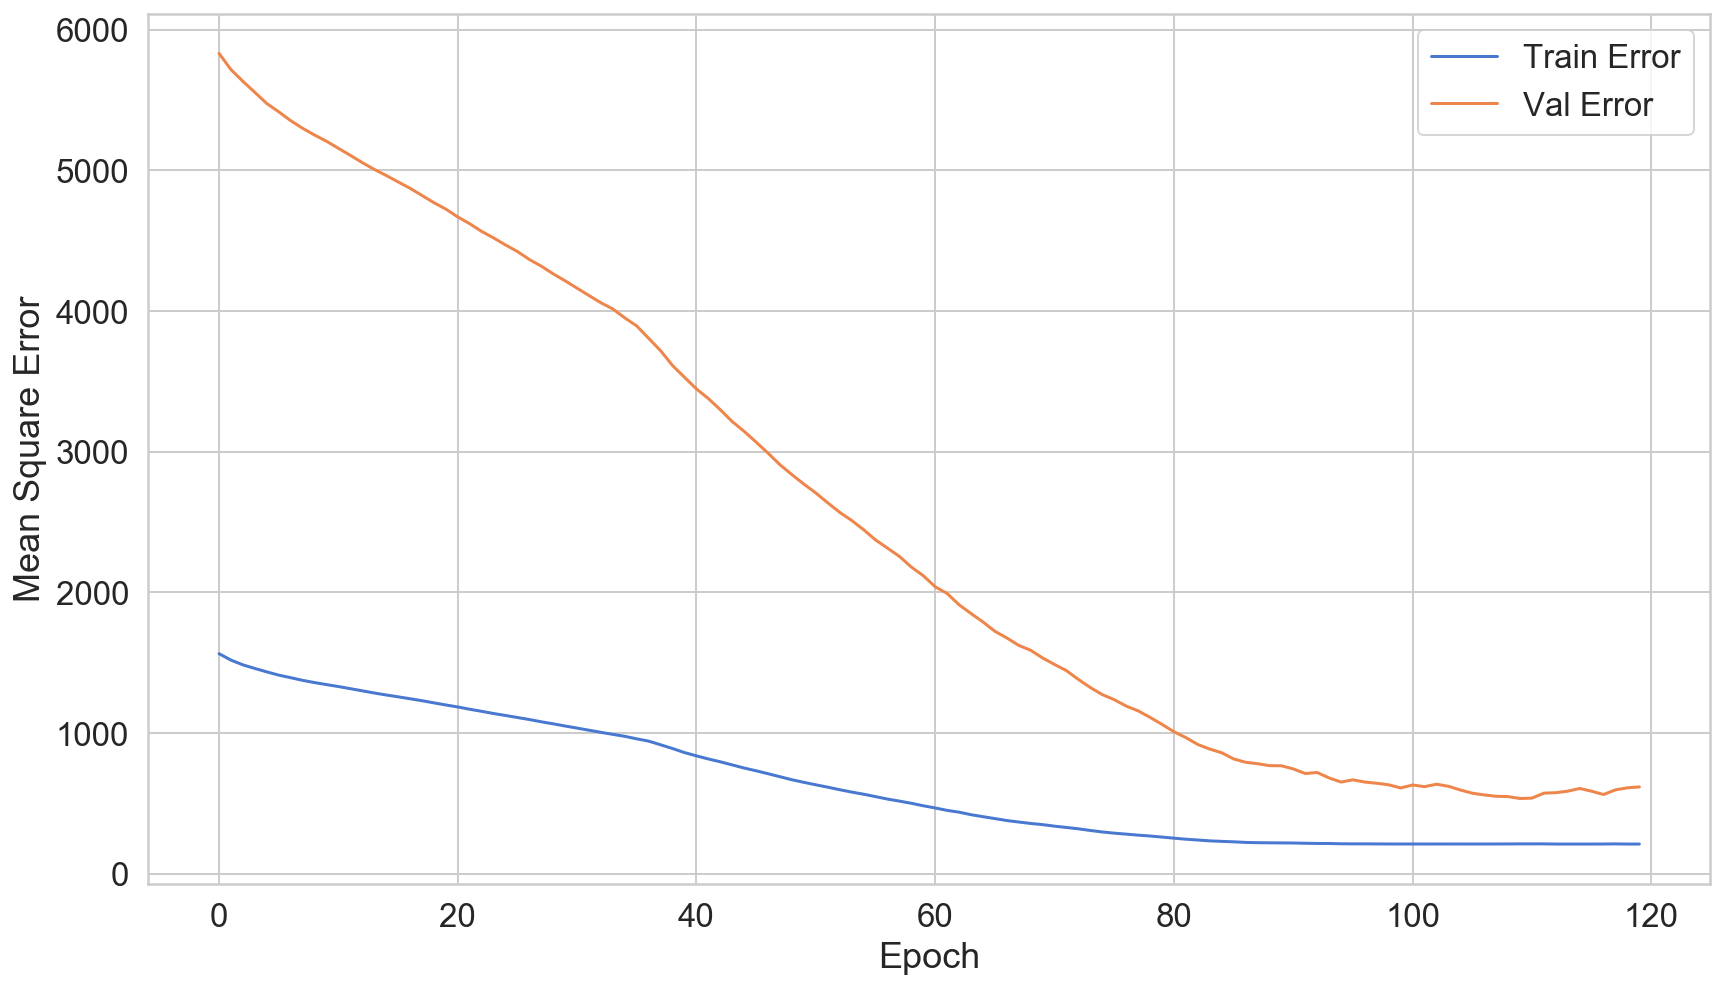

In [129]:
plot_error(history)

## Save/Restore Model

In [135]:
net.save('simple_net.h5')
net.predict(np.array([1]))

array([[3.8643148]], dtype=float32)

In [131]:
simple_net = keras.models.load_model('simple_net.h5')

In [136]:
simple_net.predict(np.array([1]))

array([[3.8643148]], dtype=float32)